# **The fifth in-class-exercise (40 points in total, 04/12/2022)**

(20 points) The purpose of the question is to practice different machine learning algorithms for text classification as well as the performance evaluation. In addition, you are requried to conduct *10 fold cross validation (https://scikit-learn.org/stable/modules/cross_validation.html)* in the training. 

The dataset can be download from here: https://github.com/unt-iialab/info5731-spring2022/blob/main/assignments/exercise05_datacollection.zip. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data. 

Algorithms:

(1) MultinominalNB

(2) SVM 

(3) KNN 

(4) Decision tree

(5) Random Forest

(6) XGBoost

Evaluation measurement:

(1) Accuracy

(2) Recall

(3) Precison 

(4) F-1 score

In [ ]:
!wget https://github.com/unt-iialab/info5731-spring2022/raw/main/assignments/exercise05_datacollection.zip
!unzip exercise05_datacollection.zip

--2022-04-25 23:17:39--  https://github.com/unt-iialab/info5731-spring2022/raw/main/assignments/exercise05_datacollection.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/unt-iialab/info5731-spring2022/main/assignments/exercise05_datacollection.zip [following]
--2022-04-25 23:17:39--  https://raw.githubusercontent.com/unt-iialab/info5731-spring2022/main/assignments/exercise05_datacollection.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 366458 (358K) [application/zip]
Saving to: ‘exercise05_datacollection.zip’

exercise05_datacoll 100%[===================>] 357.87K  --.-KB/s    in 0.02s 

# **Read and Formating Trainig Dataset**

In [ ]:
import pandas as pd
data = open('/content/exercise09_datacollection/stsa-train.txt').read()
labels, text = [], []
for i, line in enumerate(data.split("\n")):
    content = line.split(' ')
    labels.append(content[0])
    text.append(" ".join(content[1:]))

# **Read and Formating Testing Dataset**

In [ ]:
testing_data = open('/content/exercise09_datacollection/stsa-test.txt').read()
test_labels, test_text = [], []
for i, line in enumerate(testing_data.split("\n")):
    content = line.split(' ')
    test_labels.append(content[0])
    test_text.append(" ".join(content[1:]))

# **Creating Dataframe**

In [ ]:
df = pd.DataFrame (list(zip(text, labels)) , columns = ['Raw Text', 'Labels'])
test_df = pd.DataFrame (list(zip(test_text, test_labels)) , columns = ['Raw Text', 'Labels'])
test_df = test_df.dropna()

# **Data Cleaning**

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
from nltk.stem import PorterStemmer
from textblob import Word
nltk.download('wordnet')
st = PorterStemmer()
nltk.download('punkt')
nltk.download('stopwords')
stop = stopwords.words('english')
df['Lower Case'] = df['Raw Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['Removal of Punctuation'] = df['Lower Case'].str.replace('[^\w\s]','')
df['Removal of Special Characters'] = df['Removal of Punctuation'].apply(lambda x: ''.join(re.sub(r"[^a-zA-Z0-9]+", ' ', charctr) for charctr in x ))
df['Stopwords Removal'] = df['Removal of Punctuation'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['Tokenization'] = df['Stopwords Removal'].apply(lambda x: TextBlob(x).words)
df['After Lemmatization'] = df['Tokenization'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x]))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  del sys.path[0]


In [ ]:
test_df['Lower Case'] = test_df['Raw Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
test_df['Removal of Punctuation'] = test_df['Lower Case'].str.replace('[^\w\s]','')
test_df['Removal of Special Characters'] = test_df['Removal of Punctuation'].apply(lambda x: ''.join(re.sub(r"[^a-zA-Z0-9]+", ' ', charctr) for charctr in x ))
test_df['Stopwords Removal'] = test_df['Removal of Punctuation'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
test_df['Tokenization'] = test_df['Stopwords Removal'].apply(lambda x: TextBlob(x).words)
test_df['After Lemmatization'] = test_df['Tokenization'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


# **Data Transformation**

In [ ]:
from sklearn import model_selection, preprocessing, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(analyzer='word')
tfidf_vect.fit(df['After Lemmatization'])
x_tfidf =  tfidf_vect.transform(df['After Lemmatization'])

In [ ]:
vect_test = TfidfVectorizer(analyzer='word', vocabulary = tfidf_vect.vocabulary_)
vect_test.fit(test_df['After Lemmatization'])
xtest = vect_test.transform(test_df['After Lemmatization'])
test_y = test_df['Labels']

# **Splitting Data into Training and Testing**

In [ ]:
from sklearn import model_selection, preprocessing, naive_bayes, metrics, svm
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(x_tfidf, df['Labels'].values,test_size=0.2)

In [ ]:
from sklearn import metrics
def get_metrics(predictions, test_data_y):
  accuracy = metrics.accuracy_score(predictions, test_data_y)
  precision = metrics.precision_score(predictions, test_data_y, pos_label='positive', average='micro')
  recall = metrics.recall_score(predictions, test_data_y, pos_label='positive', average='micro')
  f1 = metrics.f1_score(predictions, test_data_y, pos_label='positive', average='micro')
  return accuracy, precision, recall, f1

In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
def cross_validation_score(modelName, x, y):
  scoring = 'accuracy'
  kfold = KFold(10, random_state = 7,shuffle=True)
  cross_val = cross_val_score(modelName, x, y, cv=kfold).mean()
  return cross_val

# **Training And Evaluating Models**

**Navie Bayes - Validation Metrics**

In [ ]:
naive_bayes_model = naive_bayes.MultinomialNB()
naive_bayes_model.fit(train_x, train_y)
naive_bayes_predictions_validation_data = naive_bayes_model.predict(valid_x)
accuracy, precision, recall, f1 = get_metrics(naive_bayes_predictions_validation_data, valid_y)
print("Accuracy is {0}\nPrecision is {1}\nRecall is {2}\nF1 is {3}".format(accuracy, precision, recall, f1))

Accuracy is 0.784115523465704
Precision is 0.784115523465704
Recall is 0.784115523465704
F1 is 0.784115523465704


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


**Cross Validation Score**

In [ ]:
nb_scores_mean = cross_validation_score(naive_bayes_model, valid_x, valid_y)
print('Navie Bayes Cross Validation Score is {0}'.format(nb_scores_mean))

Navie Bayes Cross Validation Score is 0.7292409550620372


**Testing Metrics**

In [ ]:
naive_bayes_predictions_test_data = naive_bayes_model.predict(xtest)
accuracy, precision, recall, f1 = get_metrics(naive_bayes_predictions_test_data, test_y)
print("Accuracy is {0}\nPrecision is {1}\nRecall is {2}\nF1 is {3}".format(accuracy, precision, recall, f1))

Accuracy is 0.7854006586169044
Precision is 0.7854006586169044
Recall is 0.7854006586169044
F1 is 0.7854006586169044


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


**Cross Validation Score - Testing**

In [ ]:
nb_test_scores_mean = cross_validation_score(naive_bayes_model, xtest, test_y)
print('Navie Bayes Cross Validation Score is {0}'.format(nb_test_scores_mean))

Navie Bayes Cross Validation Score is 0.7371044256290158


**SVM - Validation Metrics**

In [ ]:
svm_model = svm.SVC()
svm_model.fit(train_x, train_y)
svm_predictions_validation_data = svm_model.predict(valid_x)
accuracy, precision, recall, f1 = get_metrics(svm_predictions_validation_data, valid_y)
print("Accuracy is {0}\nPrecision is {1}\nRecall is {2}\nF1 is {3}".format(accuracy, precision, recall, f1))

Accuracy is 0.7768953068592058
Precision is 0.7768953068592058
Recall is 0.7768953068592058
F1 is 0.7768953068592058


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


**Cross Validation Score**

In [ ]:
svm_scores_mean = cross_validation_score(svm_model, valid_x, valid_y)
print('SVM Cross Validation Score is {0}'.format(svm_scores_mean))

SVM Cross Validation Score is 0.7198571577520593


**Testing Metrics**

In [ ]:
svm_predictions_test_data = svm_model.predict(xtest)
accuracy, precision, recall, f1 = get_metrics(svm_predictions_test_data, test_y)
print("Accuracy is {0}\nPrecision is {1}\nRecall is {2}\nF1 is {3}".format(accuracy, precision, recall, f1))

Accuracy is 0.787596048298573
Precision is 0.787596048298573
Recall is 0.787596048298573
F1 is 0.7875960482985729


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


**Cross Validation Score - Testing**

In [ ]:
svm_test_scores_mean = cross_validation_score(svm_model, xtest, test_y)
print('SVM Cross Validation Score is {0}'.format(svm_test_scores_mean))

SVM Cross Validation Score is 0.7239086050561461


**KNN - Validation Metrics**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors = 15)
knn_model.fit(train_x, train_y)
knn_predictions_valid_data = knn_model.predict(valid_x)
accuracy, precision, recall, f1 = get_metrics(knn_predictions_valid_data, valid_y)
print("Accuracy is {0}\nPrecision is {1}\nRecall is {2}\nF1 is {3}".format(accuracy, precision, recall, f1))

Accuracy is 0.699638989169675
Precision is 0.699638989169675
Recall is 0.699638989169675
F1 is 0.699638989169675


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


**Cross Validation Score**

In [ ]:
knn_scores_mean = cross_validation_score(knn_model, valid_x, valid_y)
print('KNN Cross Validation Score is {0}'.format(knn_scores_mean))

KNN Cross Validation Score is 0.6816025440517153


**Testing Metrics**

In [ ]:
knn_predictions_test_data = knn_model.predict(xtest)
accuracy, precision, recall, f1 = get_metrics(knn_predictions_test_data, test_y)
print("Accuracy is {0}\nPrecision is {1}\nRecall is {2}\nF1 is {3}".format(accuracy, precision, recall, f1))

Accuracy is 0.6899012074643249
Precision is 0.6899012074643249
Recall is 0.6899012074643249
F1 is 0.6899012074643249


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


**Cross Validation Score - Testing**

In [ ]:
knn_test_scores_mean = cross_validation_score(knn_model, xtest, test_y)
print('KNN Cross Validation Score is {0}'.format(knn_test_scores_mean))

KNN Cross Validation Score is 0.6361376328589443


**Decision Tree - Validation Metrics**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(train_x, train_y)
dt_predictions_valid_data = dt_model.predict(valid_x)
accuracy, precision, recall, f1 = get_metrics(dt_predictions_valid_data, valid_y)
print("Accuracy is {0}\nPrecision is {1}\nRecall is {2}\nF1 is {3}".format(accuracy, precision, recall, f1))

Accuracy is 0.6620938628158844
Precision is 0.6620938628158844
Recall is 0.6620938628158844
F1 is 0.6620938628158844


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


**Cross Validation Score**

In [ ]:
dt_scores_mean = cross_validation_score(dt_model, valid_x, valid_y)
print('Decision Tree Cross Validation Score is {0}'.format(dt_scores_mean))

Decision Tree Cross Validation Score is 0.594974455218434


**Testing Metrics**

In [ ]:
dt_predictions_test_data = dt_model.predict(xtest)
accuracy, precision, recall, f1 = get_metrics(dt_predictions_test_data, test_y)
print("Accuracy is {0}\nPrecision is {1}\nRecall is {2}\nF1 is {3}".format(accuracy, precision, recall, f1))

Accuracy is 0.6531284302963776
Precision is 0.6531284302963776
Recall is 0.6531284302963776
F1 is 0.6531284302963776


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


**Cross Validation Score - Testing**

In [ ]:
dt_test_scores_mean = cross_validation_score(dt_model, xtest, test_y)
print('Decision Tree Cross Validation Score is {0}'.format(dt_test_scores_mean))

Decision Tree Cross Validation Score is 0.6212664384795531


**Random Forest - Validation Metrics**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(train_x, train_y)
rf_predictions_valid_data = rf_model.predict(valid_x)
accuracy, precision, recall, f1 = get_metrics(rf_predictions_valid_data, valid_y)
print("Accuracy is {0}\nPrecision is {1}\nRecall is {2}\nF1 is {3}".format(accuracy, precision, recall, f1))

Accuracy is 0.7465703971119133
Precision is 0.7465703971119133
Recall is 0.7465703971119133
F1 is 0.7465703971119133


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


**Cross Validation Score**

In [ ]:
rf_scores_mean = cross_validation_score(rf_model, valid_x, valid_y)
print('Random Forest Cross Validation Score is {0}'.format(rf_scores_mean))

Random Forest Cross Validation Score is 0.6635283077885518


**Testing Metrics**

In [ ]:
rf_predictions_test_data = rf_model.predict(xtest)
accuracy, precision, recall, f1 = get_metrics(rf_predictions_test_data, test_y)
print("Accuracy is {0}\nPrecision is {1}\nRecall is {2}\nF1 is {3}".format(accuracy, precision, recall, f1))

Accuracy is 0.743139407244786
Precision is 0.743139407244786
Recall is 0.743139407244786
F1 is 0.743139407244786


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


**Cross Validation Score - Testing**

In [ ]:
rf_test_scores_mean = cross_validation_score(rf_model, xtest, test_y)
print('Random Forest Cross Validation Score is {0}'.format(rf_test_scores_mean))

Random Forest Cross Validation Score is 0.66466402450009


**XG Boost - Validation Metrics**

In [ ]:
from xgboost import XGBClassifier
xg_model = XGBClassifier()
xg_model.fit(train_x, train_y)
xg_predictions_valid_data = xg_model.predict(valid_x)
accuracy, precision, recall, f1 = get_metrics(xg_predictions_valid_data, valid_y)
print("Accuracy is {0}\nPrecision is {1}\nRecall is {2}\nF1 is {3}".format(accuracy, precision, recall, f1))

Accuracy is 0.6303249097472924
Precision is 0.6303249097472924
Recall is 0.6303249097472924
F1 is 0.6303249097472924


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


**Cross Validation Score**

In [ ]:
xg_scores_mean = cross_validation_score(XGBClassifier(), valid_x, valid_y)
print('XG Boost Cross Validation Score is {0}'.format(xg_scores_mean))

XG Boost Cross Validation Score is 0.6093733708685225


**Testing Metrics**

In [ ]:
xg_predictions_test_data = xg_model.predict(xtest)
accuracy, precision, recall, f1 = get_metrics(xg_predictions_test_data, test_y)
print("Accuracy is {0}\nPrecision is {1}\nRecall is {2}\nF1 is {3}".format(accuracy, precision, recall, f1))

Accuracy is 0.6394072447859495
Precision is 0.6394072447859495
Recall is 0.6394072447859495
F1 is 0.6394072447859495


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


**Cross Validation Score - Testing**

In [ ]:
xg_test_scores_mean = cross_validation_score(XGBClassifier(), xtest, test_y)
print('XG Boost Cross Validation Score is {0}'.format(xg_test_scores_mean))

XG Boost Cross Validation Score is 0.6251035849396506


**Accuracies of the models are as follows when use test data -**

1. Navie Bayes - 78.86%
2. SVM - 78.70%
3. KNN - 72.94%
4. Decision Tree - 65.14%
5. Random Forest - 74.14%
6. XG Boost - 64.92%

(20 points) The purpose of the question is to practice different machine learning algorithms for text clustering
Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

Apply the listed clustering methods to the dataset:

K means, 
DBSCAN,
Hierarchical clustering. 

You can refer to of the codes from  the follwing link below. 
https://www.kaggle.com/karthik3890/text-clustering 

# **Reading Data from CSV File**

In [ ]:
!unzip Amazon_Unlocked_Mobile.csv.zip

Archive:  Amazon_Unlocked_Mobile.csv.zip
  inflating: Amazon_Unlocked_Mobile.csv  


In [ ]:
import pandas as pd
data = pd.read_csv("Amazon_Unlocked_Mobile.csv")
data = data.head(5000)
data

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0
...,...,...,...,...,...,...
4995,Apple iPhone 3GS 16GB (Black) - AT&T MC135LL/A,Apple,30.99,5,This review is not for the product as you may ...,64.0
4996,Apple iPhone 3GS 16GB (Black) - AT&T MC135LL/A,Apple,30.99,4,The product was in good structure. I'm still n...,0.0
4997,Apple iPhone 3GS 16GB (Black) - AT&T MC135LL/A,Apple,30.99,1,The iPhone was fine. It works and is in good c...,157.0
4998,Apple iPhone 3GS 16GB (Black) - AT&T MC135LL/A,Apple,30.99,2,Screen cracked really quick.,0.0


In [ ]:
data.shape

(5000, 6)

In [ ]:
data_after_removing_null_values = data.dropna()

In [ ]:
data_after_removing_null_values.shape

(3422, 6)

**Visualizing Ratings**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


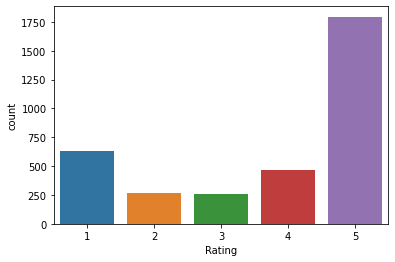

In [ ]:
import seaborn as sns
sns.countplot(data_after_removing_null_values.Rating)

**Classifying Ratings as Positive or Negative**

In [ ]:
def review_classification(rating):
    if rating < 3:
        return 'negative'
    return 'positive'

rating_classification = data_after_removing_null_values['Rating'].map(review_classification) 
data_after_removing_null_values['Rating'] = rating_classification

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
data_after_removing_null_values['Rating'].value_counts()

positive    2522
negative     900
Name: Rating, dtype: int64

**Visualizing Ratings**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


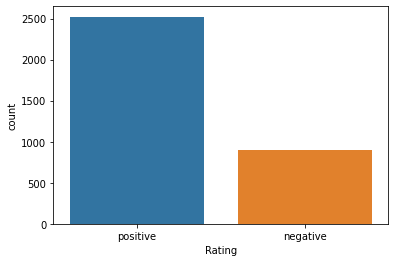

In [ ]:
import seaborn as sns
sns.countplot(data_after_removing_null_values.Rating)

# **Data Cleaning**

In [ ]:
import re
i=0;
for sent in data_after_removing_null_values['Reviews'].values:
    if (len(re.findall('<.*?>', sent))):
        print(i)
        print(sent)
        break;
    i += 1;

3205
Unless you know how to jail break this phone... what's the point? Most apps don't support this old phone. <(it's not really old, they just want you to spend money on the newer version. wtf? but whatever)>


In [ ]:
def cleanhtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext

Transforming to Lower Case, Removing HTML Content, Removing Special Characters

In [ ]:
import re
data_after_removing_null_values['Cleaned Text'] = data_after_removing_null_values['Reviews'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data_after_removing_null_values['Cleaned Text'] = data_after_removing_null_values['Cleaned Text'].apply(lambda x: cleanhtml(x))
data_after_removing_null_values['Cleaned Text'] = data_after_removing_null_values['Cleaned Text'].apply(lambda x: ''.join(re.sub(r"[^a-zA-Z0-9]+", ' ', charctr) for charctr in x ))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Removing Stop Words

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
data_after_removing_null_values['Cleaned Text'] = data_after_removing_null_values['Cleaned Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


# **K Means Using Bag of Words**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
bow = count_vect.fit_transform(data_after_removing_null_values['Cleaned Text'].values)

In [ ]:
column_names = count_vect.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 10, init='k-means++', random_state=99)
model.fit(bow)

KMeans(n_clusters=10, random_state=99)

In [ ]:
labels = model.labels_
cluster_center = model.cluster_centers_
cluster_center

array([[0.0031348 , 0.        , 0.        , ..., 0.00089566, 0.        ,
        0.        ],
       [0.00985915, 0.00140845, 0.0028169 , ..., 0.0028169 , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.02258065, 0.        , 0.00645161, ..., 0.00322581, 0.00645161,
        0.00967742],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
from sklearn import metrics
silhouette_score = metrics.silhouette_score(bow, labels, metric='euclidean')
silhouette_score

0.19659068487820835

In [ ]:
df = data_after_removing_null_values
df['Bow Clus Label'] = model.labels_
df.groupby(['Bow Clus Label'])['Reviews'].count()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Bow Clus Label
0    2233
1     710
2       1
3     141
4      20
5       3
6       1
7       1
8     310
9       2
Name: Reviews, dtype: int64

In [ ]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = count_vect.get_feature_names()
for i in range(10):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
        print()

Top terms per cluster:
Cluster 0: phone
 great
 good
 works
 price
 screen
 like
 love
 work
 one
Cluster 1: phone
 great
 screen
 good
 one
 price
 work
 use
 would
 new
Cluster 2: phone
 issues
 great
 lte
 software
 good
 gps
 annoying
 youtube
 turned
Cluster 3: phone
 screen
 good
 use
 one
 like
 great
 battery
 sim
 camera
Cluster 4: phone
 screen
 like
 camera
 one
 battery
 good
 use
 would
 get
Cluster 5: phone
 screen
 data
 tracfone
 like
 android
 alcatel
 good
 really
 time
Cluster 6: phone
 note
 one
 even
 would
 sd
 dollar
 compared
 card
 screen
Cluster 7: phone
 quality
 good
 one
 like
 moto
 camera
 light
 display
 experience
Cluster 8: phone
 screen
 good
 great
 one
 like
 camera
 would
 battery
 get
Cluster 9: phone
 camera
 like
 idol
 sound
 one
 screen
 feature
 use
 price


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


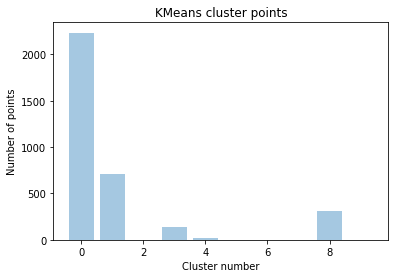

In [ ]:
import matplotlib.pyplot as plt
plt.bar([x for x in range(10)], df.groupby(['Bow Clus Label'])['Reviews'].count(), alpha = 0.4)
plt.title('KMeans cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()

# **K Means using Average Words to Vectors**

In [ ]:
list_of_sentences = []
for sentence in data_after_removing_null_values['Cleaned Text'].values:
    list_of_sentences.append(sentence.split())

In [ ]:
import gensim
w2v_model=gensim.models.Word2Vec(list_of_sentences,size=100, workers=4)

In [ ]:
import numpy as np
sent_vectors = []
for sent in list_of_sentences:
  sent_vec = np.zeros(100)
  cnt_words = 0
  for word in sent:
    try:
      vec = w2v_model.wv[word]
      sent_vec += vec
      cnt_words += 1
    except:
      pass
  sent_vec /= cnt_words
  sent_vectors.append(sent_vec)
sent_vectors = np.array(sent_vectors)
sent_vectors = np.nan_to_num(sent_vectors)
sent_vectors.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


(3422, 100)

In [ ]:
num_clus = [x for x in range(3,11)]
num_clus

[3, 4, 5, 6, 7, 8, 9, 10]

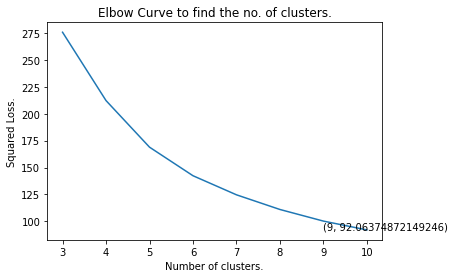

In [ ]:
squared_errors = []
for cluster in num_clus:
    kmeans = KMeans(n_clusters = cluster).fit(sent_vectors)
    squared_errors.append(kmeans.inertia_)
    
optimal_clusters = np.argmin(squared_errors) + 2 
plt.plot(num_clus, squared_errors)
plt.title("Elbow Curve to find the no. of clusters.")
plt.xlabel("Number of clusters.")
plt.ylabel("Squared Loss.")
xy = (optimal_clusters, min(squared_errors))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.show()

In [ ]:
print ("The optimal number of clusters obtained is - ", optimal_clusters)
print ("The loss for optimal cluster is - ", min(squared_errors))

The optimal number of clusters obtained is -  9
The loss for optimal cluster is -  92.06374872149246


In [ ]:
from sklearn.cluster import KMeans
model2 = KMeans(n_clusters = optimal_clusters)
model2.fit(sent_vectors)

KMeans(n_clusters=9)

In [ ]:
word_cluster_pred = model2.predict(sent_vectors)
word_cluster_pred_2 = model2.labels_
df['AVG-W2V Clus Label'] = model2.labels_
word_cluster_center = model2.cluster_centers_
word_cluster_center[1:2]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


array([[-1.22877205e-01, -2.51351849e-01,  9.45450917e-02,
        -2.44338144e-01, -7.17254108e-02,  1.17442025e-01,
        -2.33275583e-01,  2.51585592e-01, -4.38525727e-01,
         2.60701420e-01, -3.27737381e-01, -4.98740192e-01,
        -1.47038765e-01,  2.99499436e-01, -2.32134329e-01,
        -1.02384028e-01, -1.39615087e-01, -2.37345426e-01,
         9.75822857e-02,  1.42011775e-01,  9.65861014e-04,
        -5.16870823e-01,  4.13798817e-02, -2.15530870e-01,
         1.93415261e-01,  1.86086449e-01, -1.31046918e-01,
         9.85583844e-02, -6.24494738e-02,  3.89088654e-01,
         6.09597743e-02,  2.76379879e-01,  8.65627435e-02,
        -2.95146358e-01,  2.32389674e-01,  5.67568766e-02,
        -3.89998707e-01,  3.25560809e-01, -1.66696823e-01,
         3.31678395e-01, -1.29058547e-01,  2.21853916e-01,
         1.10901195e-01,  2.50296261e-02,  2.05460010e-01,
        -5.78459159e-02, -4.81653797e-01,  1.31433524e-01,
         5.36813748e-03,  9.20408821e-02, -2.24020029e-0

In [ ]:
for i in range(4):
    print("A review of assigned to cluster ", i)
    print("-" * 70)
    print(df.iloc[df.groupby(['AVG-W2V Clus Label']).groups[i][0]]['Reviews'])
    print('\n')
    print(df.iloc[df.groupby(['AVG-W2V Clus Label']).groups[i][1]]['Reviews'])
    print('\n')
    print("_" * 70)

A review of assigned to cluster  0
----------------------------------------------------------------------
was not in good condition but does work good


excellent


______________________________________________________________________
A review of assigned to cluster  1
----------------------------------------------------------------------
Very pleased


The charging port was loose. I got that soldered in. Then needed a new battery as well. $100 later (not including cost of purchase) I have a usable phone. The phone should not have been sold in the state it was in.


______________________________________________________________________
A review of assigned to cluster  2
----------------------------------------------------------------------
excelente


excelente


______________________________________________________________________
A review of assigned to cluster  3
----------------------------------------------------------------------
nice phone, nice up grade from my pantach revue.

# **DBSCAN Clustering**

In [ ]:
from sklearn.cluster import DBSCAN
minPts = 2 * 100
def lower_bound(nums, target):
    l, r = 0, len(nums) - 1
    while l <= r:
        mid = int(l + (r - l) / 2)
        if nums[mid] >= target:
            r = mid - 1
        else:
            l = mid + 1
    return l

def compute200thnearestneighbour(x, data):
    dists = []
    for val in data:
        dist = np.sum((x - val) **2 )
        if(len(dists) == 200 and dists[199] > dist):
            l = int(lower_bound(dists, dist))
            if l < 200 and l >= 0 and dists[l] > dist:
                dists[l] = dist
        else:
            dists.append(dist)
            dists.sort()
    
    return dists[199]

In [ ]:
twohundrethneigh = []
for val in sent_vectors[:1500]:
    twohundrethneigh.append( compute200thnearestneighbour(val, sent_vectors[:1500]) )
twohundrethneigh.sort()

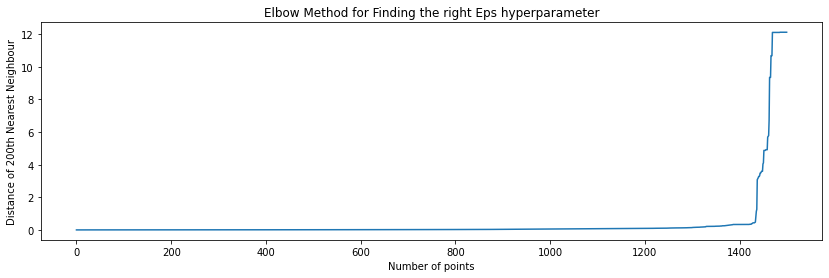

In [ ]:
plt.figure(figsize=(14,4))
plt.title("Elbow Method for Finding the right Eps hyperparameter")
plt.plot([x for x in range(len(twohundrethneigh))], twohundrethneigh)
plt.xlabel("Number of points")
plt.ylabel("Distance of 200th Nearest Neighbour")
plt.show()

In [ ]:
model = DBSCAN(eps = 5, min_samples = minPts, n_jobs=-1)
model.fit(sent_vectors)

DBSCAN(eps=5, min_samples=200, n_jobs=-1)

In [ ]:
dbscandf = df
dbscandf['AVG-W2V Clus Label'] = model.labels_
dbscandf.groupby(['AVG-W2V Clus Label'])['Product Name', 'Brand Name', 'Reviews'].count()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,Product Name,Brand Name,Reviews
AVG-W2V Clus Label,,,
0,3422,3422,3422


# **Hierarichal Clustering**

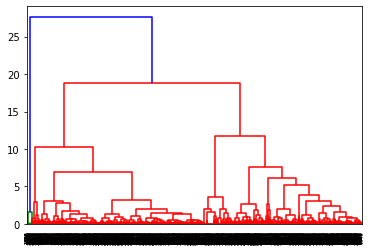

In [ ]:
import scipy
from scipy.cluster import hierarchy
dendro=hierarchy.dendrogram(hierarchy.linkage(sent_vectors, method='ward'))
plt.axhline(y=45)

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
Agg=cluster.fit_predict(sent_vectors)

In [ ]:
hcdf = dbscandf
hcdf['AVG-W2V Clus Label'] = cluster.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
hcdf.groupby(['AVG-W2V Clus Label'])['Reviews'].count()

AVG-W2V Clus Label
0    1310
1     301
2    1676
3      61
4      74
Name: Reviews, dtype: int64

In [ ]:
df['AVG-W2V Clus Label'] = cluster.labels_
aggdfa = df
aggdfa.groupby(['AVG-W2V Clus Label'])['Product Name', 'Brand Name', 'Reviews'].count()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,Product Name,Brand Name,Reviews
AVG-W2V Clus Label,,,
0,1310,1310,1310
1,301,301,301
2,1676,1676,1676
3,61,61,61
4,74,74,74


In [ ]:
for i in range(5):
    print("2 reviews of assigned to cluster ", i)
    print("-" * 70)
    print(df.iloc[df.groupby(['AVG-W2V Clus Label']).groups[i][0]]['Reviews'])
    print('\n')
    print(df.iloc[df.groupby(['AVG-W2V Clus Label']).groups[i][1]]['Reviews'])
    print('\n')
    print("_" * 70)

2 reviews of assigned to cluster  0
----------------------------------------------------------------------
nice phone, nice up grade from my pantach revue. Very clean set up and easy set up. never had an android phone but they are fantastic to say the least. perfect size for surfing and social media. great phone samsung


It works good but it goes slow sometimes but its a very good phone I love it


______________________________________________________________________
2 reviews of assigned to cluster  1
----------------------------------------------------------------------
was not in good condition but does work good


excellent


______________________________________________________________________
2 reviews of assigned to cluster  2
----------------------------------------------------------------------
I feel so LUCKY to have found this used (phone to us & not used hard at all), phone on line from someone who upgraded and sold this one. My Son liked his old one that finally fell ap

In one paragraph, please compare K means, DBSCAN and Hierarchical clustering. 

Using K Means we can easily classify the clusters into groups and also we can find the optimum number of clusters and train the KMeans model using the optimum number of clusters which gives us best model to classify the Reviews. Second best model is Hierarchical clustering, but it will be very difficult to classify the clusters using Hierarchical clustering. DBScan classifed all the reviews into single cluster which is not best fit.